## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# Reading the .csv file
df = pd.read_csv('ab_data.csv')
# Displaying the top few rows of the read .csv file
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
# Finding the total number of rows in the dataset
number_of_rows = len(df)
print(number_of_rows)

294478


c. The number of unique users in the dataset.

In [4]:
# Finding the number of unique users in the dataset
unique_users = len(df.user_id.unique())
print(unique_users)

290584


d. The proportion of users converted.

In [5]:
# Finding the proportion of users converted
proportion_users_converted = df.converted.sum()/number_of_rows
print(proportion_users_converted)

0.11965919355605512


e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
# Finding the number of times the new_page and treatment don't line up. 
# To do this, check if landing page is 'old_page' when group is 'treatment', and is 'new_page' when group is 'control'

df_treatment_not_new = df[(df['group'] == 'treatment') & (df['landing_page'] == 'old_page')]
df_control_not_old = df[(df['group'] == 'control') & (df['landing_page'] == 'new_page')]

number_of_times_nolineup = len(df_treatment_not_new)+len(df_control_not_old)

print(number_of_times_nolineup)


3893


f. Do any of the rows have missing values?

In [7]:
# Finding if any null values exist
df.isnull().values.any()

False

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# Removing the rows that don't line up
df2 = df
df_treatment_not_new = df2[(df2['group'] == 'treatment') & (df2['landing_page'] == 'old_page')]
df_control_not_old = df2[(df2['group'] == 'control') & (df2['landing_page'] == 'new_page')]
remove_rows = pd.concat([df_treatment_not_new + df_control_not_old])
remove_indexes = remove_rows.index
df2 = df2.drop(remove_indexes)

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
# Finding number of unique users in df2
print(len(df2.user_id.unique()))

290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
# Finding the duplicated user in df2
df2[df2.duplicated('user_id')]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [12]:
# Row information of the duplicate id
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
# Removing one of the repeated rows
df2.drop(labels=1899, axis=0, inplace=True)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
# Finding the probability of an individual converting regardless of the page they receive
print(df2.converted.mean())

0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
# Finding probability of an individual's conversion when in control group
print(df2[df2['group']=='control']['converted'].mean())

0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
# Finding probability of an individual's conversion when in treatment group
print(df2[df2['group']=='treatment']['converted'].mean())

0.11880806551510564


d. What is the probability that an individual received the new page?

In [17]:
# Finding the probability that an individual received the new page
print(df2['landing_page'].value_counts()[0]/len(df2))

0.500061944223


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

The conversion rate of the control group is higher than that of the treatment group. Even though it can be observed that people with the old page converted more, than those with the new page, this observation is not very significant, as there is only a difference of 0.2%. Thus, the evidence is still insufficient to say that the new treatment page leads to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

The null hypothesis is that the difference between the population conversion rate of users given the new page and the population conversion rate of users given the old page will be less than or equal to zero.
The alternative hypothesis is that the difference between the population conversion rate of users given the new page and the population conversion rate of users given the old page will be greater than zero.

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [18]:
new_p = df2[df2['landing_page']=='new_page']['converted'].mean()
old_p = df2[df2['landing_page']=='old_page']['converted'].mean()
mean_p = np.mean([new_p,old_p])
print(mean_p)

0.119597185008


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [19]:
print(new_p-old_p)

-0.0015782389853555567


c. What is $n_{new}$?

In [20]:
n_new = df2['landing_page'].value_counts()
print(n_new)

new_page    145310
old_page    145274
Name: landing_page, dtype: int64


d. What is $n_{old}$?

In [21]:
n_old = df2['landing_page'].value_counts()
print(n_old)

new_page    145310
old_page    145274
Name: landing_page, dtype: int64


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
new_page_converted = np.random.choice([1, 0], size=145310, p=[mean_p,1-mean_p])
print(new_page_converted.mean())

0.119523776753


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
old_page_converted = np.random.choice([1,0], size=154274, p=[mean_p,1-mean_p])
print(old_page_converted.mean())

0.119922994153


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
print(new_page_converted.mean()-old_page_converted.mean())

-0.000399217400111


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [25]:
p_diffs = []
for i in range(10000):
    new_page_converted = np.random.choice([1, 0], size=145310, p=[mean_p,1-mean_p])
    old_page_converted = np.random.choice([1,0], size=154274, p=[mean_p,1-mean_p])
    p_diff = new_page_converted.mean()-old_page_converted.mean()
    p_diffs.append(p_diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

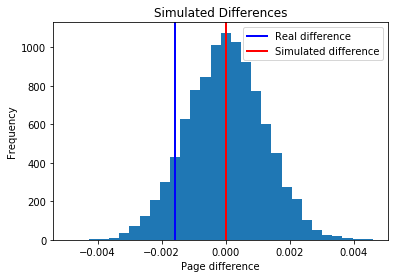

In [26]:
plt.hist(p_diffs, bins=30)
plt.title('Simulated Differences')
plt.xlabel('Page difference')
plt.ylabel('Frequency')
plt.axvline(x=(new_p-old_p), color='b', linestyle='solid', linewidth=2, label="Real difference")
plt.axvline(x=(np.array(p_diffs).mean()), color='r', linestyle='solid', linewidth=2, label="Simulated difference")
plt.legend()
plt.show()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [27]:
p_diff = new_p-old_p
greater_diffs = [i for i in p_diffs if i > p_diff]
greater_p_diffs = len(greater_diffs)/len(p_diffs)
print(greater_p_diffs)

0.9049


k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

In part j, the p-value was computed. It is the level of marginal significance within a statistical hypothesis test representing the probability of the occurrence of a given event. The p-value is used as an alternative to rejection points to provide the smallest level of significance at which the null hypothesis would be rejected (Source: Wikipedia). The p-value obtained is 0.9084. The suggested p-critical, is however, 0.05. If the p-value is less than or equal to the p-critical, then the null hypothesis is rejected in favor of the alternative hypothesis. And, if the p-value is greater than p-critical, then the null hypothesis is not rejected. Since the p-value obtained is greater than the p-critical, the null hypothesis is not rejected.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [28]:
import statsmodels.api as sm

convert_old = len(df2[(df2['landing_page']=='old_page')&(df2['converted']==1)])
convert_new = len(df2[(df2['landing_page']=='new_page')&(df2['converted']==1)])
n_old = n_old
n_new = n_new

print(convert_old)
print(convert_new)
print(n_old)
print(n_new)

/Users/knaparnashriraksha/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


17489
17264
new_page    145310
old_page    145274
Name: landing_page, dtype: int64
new_page    145310
old_page    145274
Name: landing_page, dtype: int64


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [29]:
z_score, p_value = sm.stats.proportions_ztest(count=[17489,17264], nobs=[145274,145310], alternative='larger')
print(z_score)
print(p_value)

1.31092419842
0.094941687241


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

Yes, the computed z-score and p-value agree with the findings in parts j. and k. There is about 1.31 difference between the real and simulated difference. Also, the p-value is only 9%. This is not enough evidence to reject the null hypotheis. 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Since each row is either a conversion or no conversion, logistic regression must be performed in this case.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [90]:
df3=df2 #backup

df3['intercept'] = pd.Series(np.zeros(len(df3)), index=df3.index)
df3['ab_page'] = pd.Series(np.zeros(len(df3)), index=df3.index)

indexes_to_be_changed = df3[df3['group']=='treatment'].index

df3.set_value(index=indexes_to_be_changed, col='ab_page', value=1)
df3.set_value(index=df3.index, col='intercept', value=1)

df3[['intercept', 'ab_page']] = df3[['intercept', 'ab_page']].astype(int)

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [92]:
model = sm.Logit(df3['converted'], df3[['ab_page', 'intercept']])
result=model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [93]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 12 Mar 2018   Pseudo R-squ.:               8.077e-06
Time:                        14:55:27   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

The p-value associated with the ab_page is 0.190. It is slightly lower than the p-value (0.207) calculated using the z-test. It differs from the previous p-value due to the addition of the intercept.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Since only one feature was chosen until now, to observe the conversion rate, adding a few more features would not cause any harm. The rate of conversion can also be determined from how much time a user spends on the page. The more time he spends, the less likely he is to convert. Also, the number of times the user visits the page may be considered. The more times a user visits the page, the more he is interested in it, and less likely to convert.
However, there will be disadvantages too, if too many additional terms are added to the regression model, or if the added terms do not have much influence on the results. While too many terms may clutter the model, less influential terms do not play any major part in deciding the outcomes. Hence, they should be left out.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [94]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [102]:
### Create the necessary dummy variables
dummy_df = pd.get_dummies(data=countries_df, columns=['country'])
df4 = dummy_df.merge(df3, on='user_id')
df4 = df4[['user_id', 'timestamp', 'group', 'landing_page', 
           'ab_page', 'country_CA', 'country_UK', 'country_US',
           'intercept', 'converted']]

df4[['ab_page', 'country_CA', 'country_UK', 'country_US','intercept', 'converted']] =\
df4[['ab_page', 'country_CA', 'country_UK', 'country_US','intercept', 'converted']].astype(int)

df4.head()

countries_model = sm.Logit(df4['converted'], df4[['country_UK', 'country_US', 'intercept']])

countries_result = countries_model.fit()

countries_result.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Mon, 12 Mar 2018   Pseudo R-squ.:               1.521e-05
Time:                        15:06:49   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
country_UK     0.0507      0.028      1.786      0.074      -0.005       0.106
country_US     0.0408      0.027      1.518      0.129      -0.012       0.093
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
==============================================================================
"""

The conversion rate changes for different pages, is not affected significantly based on what country a user lives in.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [104]:
### Fit Your Linear Model And Obtain the Results
countries_model2 = sm.Logit(df4['converted'], df4[['ab_page', 'country_UK', 'country_US', 'intercept']])
countries_model2_result = countries_model2.fit()
countries_model2_result.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 12 Mar 2018   Pseudo R-squ.:               2.323e-05
Time:                        15:08:49   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
country_UK     0.0506      0.028      1.784      0.074      -0.005       0.106
country_US     0.0408      0.027      1.516      0.130      -0.012       0.093
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
==============================================================================
"""

<a id='conclusions'></a>
## Conclusions

In conclusion, it can be said that, there is nit enough evidence to reject the null hypothesis, even though a difference can be observed in the conversion rates of old and new pages. In fact, the histogram shows that the performance of new page is far worse than that of the old page.
By observing the conversion rates of US and UK, it can be stated that the conversion rate is not dependent on countries, as both the countries exhibit roughly the same conversion rate. 
Hence, I would recommend the e-commerce company to keep the old page. Also, there is no need of running the experiment longer to make their decision, as the test conditions were all favorable. 


### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.